# Correlation Between Companies in The Same Industry

1. <a href='#Introduction'>Introduction</a>
2. <a href='#Questions'>Questions</a> 
3. <a href='#Data_Sources'>Data Sources</a> 
4. <a href='#Libraries'>Import Required Libraries </a>
5. <a href='#Inputs'>Set Inputs </a>
6. <a href='#Names'>Load and Format S&P500 and ASX Names and Details</a>
9. <a href='#Prices'>Load, Review and Format Prices for FX Rates and Shares</a>
10. <a href='#Pairs'>Create a Universe of Pairs</a>
11. <a href='#Sectors'>Analysis of Names by Sector</a>
13. <a href='#Correlations'>Correlation Results</a>
14. <a href='#Findings'>Summary of Findings</a>
14. <a href='#References'>References</a>

<a id="introduction"></a>
# 1. Introduction

With the recent advances in Neural Nets I became interested in whether Machine Learning could effectively be applied to improve investing and trading results vs traditional methods.  What I discovered is that Quantitative techniques generally are very useful tools for this, but like all tools, they are better suited to some tasks than others.

Pairs Trading is a task/ strategy I believe quantitative tools are well suited for.  "A pairs trade is a trading strategy that involves matching a long position with a short position in two stocks with a high correlation." (Investopida.com, 2023). In simple terms, you find two stocks whose prices show high level of correlation.  When they deviate from this correlation, you buy one stock and sell the other and wait for the prior level of correlation to revert to its mean.  If it does so, you will make a profit and vice versa.  Key to this strategy is identifying stocks whose prices  have a high level of correlation to each other - and which are likely to continue to have a high degree of correlation in the future.

We can identify which pairs have historically shown a high level of correlation through by generating correlation statistics for every single combination of pairs possible and then select those which appear stronger than a threshold.  However, the weakness of this approach is that some pairs will show high levels of correlation historically through randomness rather than fundamentals - and their correlation is less likely to persist into the future.  For this reason it helps to determine factors which identify when a high correlation is likely to be due to fundamentals.  

This project will assess **whether stocks being members of the same sector** are such a factor.  That is, if two companies are in the same sector (industry) are their prices more likely to be correlated  than the prices of two random companies (likely to be in different industries).  

We will use the term Sector and Industry interchangeably.

*Sample Required*

With enough computing power it would be technically possible to generate a list of pairs of using a population of every  single share listed on specified stock exchanges.  However, given the memory and processing constrainsts of the Ed environment we need to quite strictly limit our sample size.  For this reason we have started with 100 stocks from the S&P500 and 15 shares from the ASX - as that number of companies appears close to, but within, Ed's capacities.  From that we have then selected a sample of 4000 random pairs generated from that population.  We have set both the 100 S&P500 members and the number of random pairs as an input that could be changed if desired.

*Only a First Step*

This assignment is not a comprehensive test of using a stock's industry as a selection factor for a pairs trading strategy - ***it is only a first step***.  It is identifying if industry appears to be a factor worth assessing further.  Further assessement would include steps such as:
* Analysing the pairs over multiple time periods;
* Increasing the same size;
* Testing not only if historical correlation of pairs in the same industry is stronger than a benchmark, but also if that persists on a forward basis.

*Approach*

Our approach is to first analyse if using industry as a factor is practical in the first place:
* How many different sectors/industries are there?
* What is the distribution across sectors?
* Do we have have enough pairs within our data to perform a meaningful test?

We then analyse the correlation of the pairs generated to form our conclusions from this first step.

<a id="Questions"></a>
# 2. Questions

Given our stated approach and desired outcomes, we seek to answer the following specific questions:

1. Given a sample of 115 diferent stocks (which is close to the processing limit of Ed):
    * How many different pairs are possible to analyze?
    * How many different pairs within the same industry are possible to analyze and compare to the 'total' universe of stocks?

2. What is the break down by industry of the sample set of companies?

3. What is the overall correlation profile of the pairs within the sample?  

4. Are pairs in the same industry more closely correlated in their price movements than random pairs?

5. Do pairs in some industries show better correlation than others?

6. If there is a difference in correlation across industries, are there any apparent reasons for this or additional steps that could be taken to try and determine those reasons?

<a id="Data_Sources"></a>
# 3. Data Sources

This project uses the following data sets the information contained within are publicly available:

1. sp500_info.csv: 
    * S&P 500 component stocks including their symbol and sector name, and sub sector name <br>
    (Wikipedia, 2023)  
    
2. asx_15_info.csv: 
    * Top 20 Shares by Value for the ASX <br>
    (ASX, 2023)  
      
3. prices_shares.csv: <br>
    * 12 Months Historical Data for 100 S&P500 shares and 15 ASX shares (in their local currency): <br>
    (Aroussi, 2023; Yahoo Finance, 2023)  
        
4. prices_fx.csv: 
    * 12 Months Historical Data for a basket of currencies: <br>
    (Aroussi, 2023; Yahoo Finance, 2023)
    

<a id="Libraries"></a>
# 4. Import Required Libraries

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

import itertools

from random import sample

import matplotlib.pyplot as plt
import seaborn as sns

<a id="Inputs"></a>
# 5. Set Inputs

In [2]:
# Target Input Files
STOCK_PRICES_FNAME = "prices_shares.csv"
FX_PRICES_FNAME = "prices_fx.csv"
SP500_MEMBERS_FNAME = "sp500_info.csv"
ASX_MEMBERS_FNAME = "asx_15_info.csv"

In [3]:
# Instead of choosing all 500 names from the S&P500, pick a selection to reduce the file sizes
SP500_SAMPLE_SIZE = 100

In [4]:
# From our list of all generated pairs, select a random sample to reduce processing requiremens
RDM_SAMPLE_SIZE = 4000

<a id="Names"></a>
# 6. Load and Format SP500 and ASX Names and Details

##  Obtain Names in SP500

In [5]:
#Read the csv file that contains the S&P component information.
sp500_info_df = pd.read_csv(SP500_MEMBERS_FNAME)
sp500_info_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [6]:
# Trim the number of S&P500 members we are going to review given processing constraints
sp500_info_df = sp500_info_df[:SP500_SAMPLE_SIZE].copy()

Review the number of members to check that it equals the input constant SP500_SAMPLE_SIZE and also that there are no duplicate symbols

In [7]:
print(SP500_SAMPLE_SIZE, sp500_info_df['Symbol'].count(),len(sp500_info_df['Symbol'].unique()))

100 100 100


<span style="color:green">&#x2705;</span>

## Data Formatting for S&P500 Names

Check for any periods in the stock symbols for US listed stocks (which includes all our S&P500 members).  Yahoo Finance, which is where we download the prices from, uses the convention that A shares and B shares utilize dashes in their names instead of periods.

In [8]:
sp500_info_df[sp500_info_df['Symbol'].str.contains(".", regex=False)]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
65,BRK.B,Berkshire Hathaway,Financials,Multi-Sector Holdings,"Omaha, Nebraska",2010-02-16,1067983,1839
81,BF.B,Brown–Forman,Consumer Staples,Distillers & Vintners,"Louisville, Kentucky",1982-10-31,14693,1870


In [9]:
# We need to replace periods with dashs within the Symbol columns for S&P500 related names as per Yahoo Finance convention
sp500_info_df['Symbol'] = sp500_info_df['Symbol'].str.replace(".", "-", regex=False)

# Check to ensure this was successful
sp500_info_df[sp500_info_df['Symbol'].str.contains(".", regex=False)]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


<span style="color:green">&#x2705;</span>

## Obtain Names in ASX

In [10]:
#Read the csv file that contains the details of 15 ASX member companies.
asx_info_df = pd.read_csv(ASX_MEMBERS_FNAME)
asx_info_df

,Symbol,Security,GICS Sector
0,BHP.AX,BHP GROUP,Materials
1,FMG.AX,FORTESCUE,Materials
2,MQG.AX,MACQUARIE GROUP,Financials
3,CBA.AX,COMMONWEATH BANK,Financials
4,RIO.AX,RIO TINTO,Materials
5,CSL.AX,CSL,Health Care
6,WDS.AX,WOODSIDE,Energy
7,ANZ.AX,ANZ GROUP,Financials
8,PLS.AX,PILBARAMIN,Materials
9,NAB.AX,NATIONAL AUSTRALIA BANK,Financials


## Merge ASX and S&P500 Names 

In [11]:
all_stocks_info_df = pd.concat([asx_info_df, sp500_info_df[['Symbol', 'Security', 'GICS Sector']]])
all_stocks_info_df                    

,Symbol,Security,GICS Sector
0,BHP.AX,BHP GROUP,Materials
1,FMG.AX,FORTESCUE,Materials
2,MQG.AX,MACQUARIE GROUP,Financials
3,CBA.AX,COMMONWEATH BANK,Financials
4,RIO.AX,RIO TINTO,Materials
...,...,...,...
95,CBOE,Cboe Global Markets,Financials
96,CBRE,CBRE Group,Real Estate
97,CDW,CDW,Information Technology
98,CE,Celanese,Materials


<a id="Prices"></a>
# 7. Load prices for Shares and FX Rates

In [12]:
# Read the Daily Historical Prices for the Stocks and FX Rates from their respective csv files
stock_prices_df = pd.read_csv(STOCK_PRICES_FNAME) # stock prices
fx_prices_df = pd.read_csv(FX_PRICES_FNAME) # foreign exchange prices

## Review the Raw FX Data

In [13]:
fx_prices_df.describe()

,AUDUSD=X,HKDUSD=X,JPYUSD=X,SGDUSD=X
count,261.000000,259.000000,261.000000,261.000000
mean,0.695038,0.127714,0.007659,0.725619
std,0.031389,0.000396,0.000634,0.013144
min,0.622394,0.127372,0.006659,0.695082
25%,0.674332,0.127400,0.007209,0.716692
50%,0.695300,0.127457,0.007465,0.726639
75%,0.718649,0.128077,0.008143,0.737300
max,0.758570,0.128718,0.008789,0.745379


It quite difficult to analyze the JPY and HKD columns given they are inverted vs how they are conventionally displayed.

Inverting them for reasonableness analysis:

In [14]:
fx_summ = fx_prices_df.describe()
# Invert FX Rate for display purposes for JPY and HKD to what is conventionally displayed
fx_summ.loc[['mean', 'min', 'max'],['JPYUSD=X', 'HKDUSD=X']] \
            = 1 / fx_summ.loc[['mean', 'min', 'max'],['JPYUSD=X', 'HKDUSD=X']]
fx_summ


,AUDUSD=X,HKDUSD=X,JPYUSD=X,SGDUSD=X
count,261.000000,259.000000,261.000000,261.000000
mean,0.695038,7.829972,130.558193,0.725619
std,0.031389,0.000396,0.000634,0.013144
min,0.622394,7.851000,150.175992,0.695082
25%,0.674332,0.127400,0.007209,0.716692
50%,0.695300,0.127457,0.007465,0.726639
75%,0.718649,0.128077,0.008143,0.737300
max,0.758570,7.768900,113.785000,0.745379


<p style="background-color:#AFE1AF;">
Min and max ranges as well as distributions seem in line with the known characteristics of the currencies.</p>

<p style="background-color:#F88379;">
We do not have the same number of records for each currency.
To fix this we will resample the data using the ffil() function when cleansing and formatting the data.</p>

&#10060;

## Cleanse/ Format FX Prices

Prior to doing the resampling and for later analysis it is better if we convert dates from being string values to Datetime values and also set the Date as the index.

In [15]:
# Format the Date and set as the Index
fx_prices_df['Date'] = pd.to_datetime(fx_prices_df['Date'], format = "%Y-%m-%d")
fx_prices_df = fx_prices_df.set_index('Date', drop=True)

Resample data to fill any missing values

In [16]:
# Forward Fill prices
# Note: This will also give a price for the week-ends, but that will get dropped later when we merge with the share prices df
fx_prices_df = fx_prices_df.resample('D').last().ffill()

Check the column counts to ensure they are now consistent

In [17]:
fx_prices_df.describe().loc['count']

AUDUSD=X    365.0
HKDUSD=X    365.0
JPYUSD=X    365.0
SGDUSD=X    365.0
Name: count, dtype: float64

&#x2705;

Here is how our FX data now looks:

In [18]:
fx_prices_df

,AUDUSD=X,HKDUSD=X,JPYUSD=X,SGDUSD=X
Date,,,,
2021-12-31,0.724980,0.128245,0.008691,0.739694
2022-01-01,0.724980,0.128245,0.008691,0.739694
2022-01-02,0.724980,0.128245,0.008691,0.739694
2022-01-03,0.726818,0.128272,0.008685,0.741730
2022-01-04,0.719800,0.128243,0.008671,0.739033
...,...,...,...,...
2022-12-26,0.671249,0.128147,0.007531,0.739809
2022-12-27,0.674459,0.128121,0.007532,0.742501
2022-12-28,0.672993,0.128199,0.007491,0.742060


&#x2705;

## Review the Stock Price Data

In [19]:
stock_prices_df.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,NCM.AX,NST.AX,PLS.AX,RIO.AX,RMD.AX,T,TECH,WBC.AX,WDS.AX,WRB
0,2022-01-03,154.908508,18.750000,224.928452,180.434311,126.534706,130.200043,134.805557,44.549999,397.086761,...,NaN,NaN,NaN,NaN,NaN,17.069723,121.268669,NaN,NaN,52.898167
1,2022-01-04,149.671646,19.020000,225.184921,178.144302,126.291786,128.963074,131.635162,45.130001,394.249115,...,23.705288,9.090141,3.428028,92.659813,35.888363,17.210688,116.353668,19.889442,19.334044,53.685848
2,2022-01-05,147.107651,18.680000,224.614975,173.405670,126.955170,130.082260,131.043747,44.599998,387.306091,...,24.005354,9.138391,3.486461,93.394104,34.698036,17.593298,108.077499,20.054728,19.419329,53.086952
3,2022-01-06,147.622437,18.570000,229.554672,170.510956,126.357178,128.069656,131.024323,44.860001,368.602905,...,23.260027,8.723448,3.311164,94.072624,33.368839,17.526175,106.041405,19.724155,18.941734,53.991798
4,2022-01-07,143.692291,19.280001,226.172867,170.679489,126.030144,130.690933,131.431549,45.070000,361.533112,...,23.260027,8.781346,3.408551,96.321960,33.616825,18.124920,103.242081,19.972084,19.359629,55.059402


**Lets Review the price values for reasonableness**

In [20]:
print(f"Minimium Share Price Value Across All Stocks: ${stock_prices_df.select_dtypes(include='number').min().min():,.02f}")
print(f"Maximum Share Price Value Across All Stocks: ${stock_prices_df.select_dtypes(include='number').max().max():,.02f}")
print(f"Mean Share Price Value Across All Stocks: ${stock_prices_df.select_dtypes(include='number').mean().mean():,.02f}")

Minimium Share Price Value Across All Stocks: $1.99
Maximum Share Price Value Across All Stocks: $2,703.26
Mean Share Price Value Across All Stocks: $160.65


The range of values for individual shares prices is quite large and thus direct comparision of absolute values would required scaling of the prices.
However, the range seems reasonable given the dataset - there are no negative values and no extremely large or small values.

&#x2705;

Lets create a scatter plot to visualize the price data

<module 'matplotlib.pyplot' from '/usr/lib/python3.11/site-packages/matplotlib/pyplot.py'>

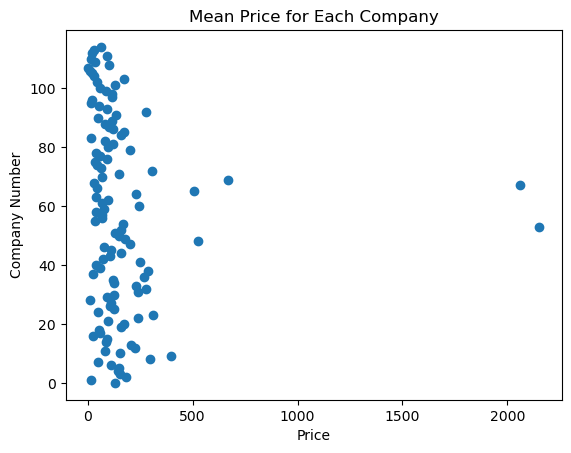

In [21]:
def scatter_plot_prices():
    """
    Function to display a scatter plot of the mean price for each stock.
    """
    av_prices_by_stock = stock_prices_df.select_dtypes(include='number').mean()
    av_prices_by_stock.index = pd.Series(range(len(av_prices_by_stock)))
    plt.scatter(x = av_prices_by_stock.values,
                y = av_prices_by_stock.index)
    plt.xlabel('Price')
    plt.ylabel('Company Number')
    plt.title('Mean Price for Each Company')
    return plt

scatter_plot_prices()


<p style="background-color:Yellow;"><b>Not Great:</b> That does not look so great with a small number of obvious outliers.</p>

Lets check to see if these represent errors or just outliers.

In [22]:
# Largest two price values by stock
stock_prices_df.select_dtypes(include='number').max().sort_values()[-2:]


AZO     2579.00000
BKNG    2703.26001
dtype: float64

Checking these manually to price sources (Yahoo Finance, 2023), the prices look accurate.  Thus the values represent outliers rather than errors.

While there are several ways to handle these outliers depending the analysis being performed and the reason for the outliers, for our analysis we are going to retain them in our data set.

**Examing the Number of Records for Each Stock**

In [23]:
print(stock_prices_df.describe().loc['count'].describe())

count    115.0
mean     251.0
std        0.0
min      251.0
25%      251.0
50%      251.0
75%      251.0
max      251.0
Name: count, dtype: float64


<p style="background-color:#AFE1AF;">
The number of records is consistent for all our stocks at 251 (Both the min and max values are 251) meaning we do not have to remove any names with a low number of trading days, nor do we have to forward fill or back fill any values.
</p>

<p style="background-color:#AFE1AF;">
    The  number of records for each of our stocks is 251.  As a reasonableness check, there are 260 (52 * 5) week days in the year and some of these will be public holidays.  So we expect somewhere around 250 trading days in a year given approximately 10 public holidays per year. 
</p>

## Format Share Pricing Data

### Convert the dates to datetime format and set them as the index

In [24]:
stock_prices_df['Date'] = pd.to_datetime(stock_prices_df['Date'], format = "%Y-%m-%d")
stock_prices_df = stock_prices_df.set_index('Date', drop=True)

### Convert Share Prices to USD Equivalent

We convert all share prices to a USD equivalent value to ensure they are comparable.

To convert from local currencies to a USD Equivalent we add a column for the FX rate applicable given the ticker code format:
* Australian stocks have .AX in their ticker, 
* Japanese stocks have .T, 
* Hong Kong stocks .HK, 
* Singapore stocks .SI; and
* US stocks have no period in their ticker

In [25]:
# Add currency column based on ticker code format
for ticker in stock_prices_df.columns:
    if ".AX" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices_df["AUDUSD=X"]
    elif ".HK" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices_df["HKDUSD=X"]
    elif ".T" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices_df["JPYUSD=X"]
    elif ".SI" in ticker:
        stock_prices_df[ticker] = stock_prices_df[ticker] * fx_prices_df["SGDUSD=X"]

<a id="Pairs"></a>
# 8. Create a Universe of Pairs

Now that we have imported and cleansed the data, we need to start manipulating it to get the answers required.

Key to this is breaking the price data for all the companies into pairs that can be analyzed.  For Example, Microsoft (MSFT) vs Google (GOOGL).


Using all the names we have data for, we can create a list of all possible pair combinations using the itertools library.

In [26]:
all_possible_pairs = [list(pair) for pair in itertools.combinations(stock_prices_df.columns, 2)]

In [27]:
print(f"The Number of All Possible Unique Pairs is: {len(all_possible_pairs):,.0f}")
print(f"\nSome Examples: {all_possible_pairs[:5]} \n{all_possible_pairs[-5:]}")

The Number of All Possible Unique Pairs is: 6,555

Some Examples: [['A', 'AAL'], ['A', 'AAP'], ['A', 'AAPL'], ['A', 'ABBV'], ['A', 'ABC']] 
[['TECH', 'WDS.AX'], ['TECH', 'WRB'], ['WBC.AX', 'WDS.AX'], ['WBC.AX', 'WRB'], ['WDS.AX', 'WRB']]


We want to look at a sample of names, instead of the full universe.  This is primarily because we have processing constrainsts.  However, we want a random sample rather than just picking the first 100 names in case their is some bias in the way they are ordered.

We have set the sample size via the input constant (RDM_SAMPLE_SIZE) in the Set Inputs section.

In [28]:
# Select a sample of pairs randomly from the our universe of all possible pairs
random_pairs = sample(all_possible_pairs, RDM_SAMPLE_SIZE)

In [29]:
print(f"Here are five examples of the pairs generated from our random sample:\n{random_pairs[:5]}")

Here are five examples of the pairs generated from our random sample:
[['ACGL', 'BBY'], ['AWK', 'CCL'], ['AMZN', 'CSL.AX'], ['ADBE', 'AZO'], ['AMCR', 'BBY']]


## Add Industry to Pairs List

The key factor we are seeking to test is Industry.  That is, if in names in the same industry show better correlation or related statistics vs random pairs. 

To do this we are going to have to merge information from multiple inputs:
- The ticker names for the pairs will come from the list of pairs we generated;
- The Industry name will come from the all_stocks_info_df
- Same Industry Column will be a engineered column we create

The Same Industry column will make queries and analysis on the dataset simplier.


In [30]:
# Build a DataFrame which lists all possible pairs, the industry of each name in the pair and if they are the same.

# Start with the all the pair combinations
all_possible_pairs_df = pd.DataFrame(all_possible_pairs, columns=['Ticker1', 'Ticker2'])

# Add the Industry Name for the first ticker
all_possible_pairs_df = pd.merge(all_possible_pairs_df, all_stocks_info_df[['Symbol', 'GICS Sector']], how='inner', left_on = 'Ticker1', right_on = 'Symbol')
# Add the Industry name for the second ticker
all_possible_pairs_df = pd.merge(all_possible_pairs_df, all_stocks_info_df[['Symbol', 'GICS Sector']], how='inner', left_on = 'Ticker2', right_on = 'Symbol')

# Remove excess columns and tidy up column names
all_possible_pairs_df.drop(columns = ['Symbol_x', 'Symbol_y'], inplace=True)
all_possible_pairs_df.rename(columns={"GICS Sector_x": "Ind1", "GICS Sector_y": "Ind2"}, inplace=True)

# Create a new column 'Same Industry' which identifies if all the two names in the pair are from the same industry
all_possible_pairs_df['Same Industry'] = np.where(all_possible_pairs_df['Ind1'] == all_possible_pairs_df['Ind2'], 'Yes', 'No')
all_possible_pairs_df

,Ticker1,Ticker2,Ind1,Ind2,Same Industry
0,A,AAL,Health Care,Industrials,No
1,A,AAP,Health Care,Consumer Discretionary,No
2,AAL,AAP,Industrials,Consumer Discretionary,No
3,A,AAPL,Health Care,Information Technology,No
4,AAL,AAPL,Industrials,Information Technology,No
...,...,...,...,...,...
6550,RMD.AX,WRB,Health Care,Financials,No
6551,T,WRB,Communication Services,Financials,No
6552,TECH,WRB,Health Care,Financials,No
6553,WBC.AX,WRB,Financials,Financials,Yes


Construct a DataFrame for the Random Pairs sample in the same format as that for all the possible pairs.

In [31]:
#Build the base df from the list of list of random pairs
random_pairs_df = pd.DataFrame(random_pairs, columns=['Ticker1', 'Ticker2'])

# Add the extra columns required via merging with the df containing all the pairs
random_pairs_df = pd.merge(random_pairs_df, all_possible_pairs_df, how='inner',
                    left_on = ['Ticker1', 'Ticker2'], right_on= ['Ticker1', 'Ticker2'])
random_pairs_df


,Ticker1,Ticker2,Ind1,Ind2,Same Industry
0,ACGL,BBY,Financials,Consumer Discretionary,No
1,AWK,CCL,Utilities,Consumer Discretionary,No
2,AMZN,CSL.AX,Consumer Discretionary,Health Care,No
3,ADBE,AZO,Information Technology,Consumer Discretionary,No
4,AMCR,BBY,Materials,Consumer Discretionary,No
...,...,...,...,...,...
3995,ALL,CNC,Financials,Health Care,No
3996,CPT,PLS.AX,Real Estate,Materials,No
3997,ANZ.AX,NST.AX,Financials,Materials,No
3998,A,T,Health Care,Communication Services,No


<a id="Sectors"></a>
# 9. Analysis of Names by Industry/ Sector

In [32]:
all_stocks_info_df['GICS Sector'].describe()

count            115
unique            11
top       Financials
freq              22
Name: GICS Sector, dtype: object

In [33]:
print(f"The Minimum Number of Members within a Sector Group is: {all_stocks_info_df.groupby('GICS Sector').size().min()}")
print(f"The Median Number of Members within a Sector Group is: {all_stocks_info_df.groupby('GICS Sector').size().median()}")

The Minimum Number of Members within a Sector Group is: 3
The Median Number of Members within a Sector Group is: 11.0


In [34]:
all_stocks_info_df.groupby('GICS Sector').size()

GICS Sector
Communication Services     4
Consumer Discretionary    11
Consumer Staples           5
Energy                     3
Financials                22
Health Care               18
Industrials               13
Information Technology    14
Materials                 12
Real Estate                7
Utilities                  6
dtype: int64

### Build and Display Graphs Analysing the Distribution of the Sector Groups

In [35]:
# Get Counts of The Number of Names Within Each Sector
sector_counts = all_stocks_info_df.groupby('GICS Sector')['Symbol'].count().sort_values(axis=0)

In [36]:
# Create a seaborn color palette for our graphs
colors = sns.color_palette("Blues", len(sector_counts))

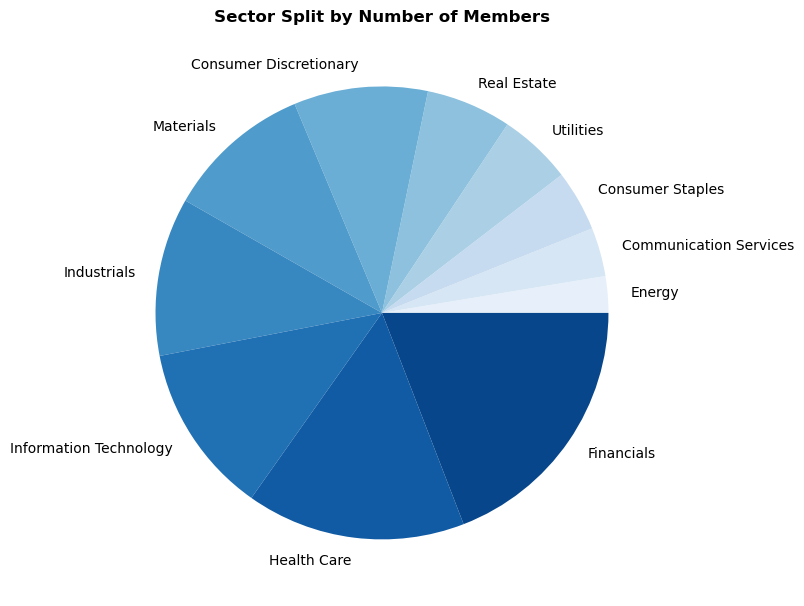

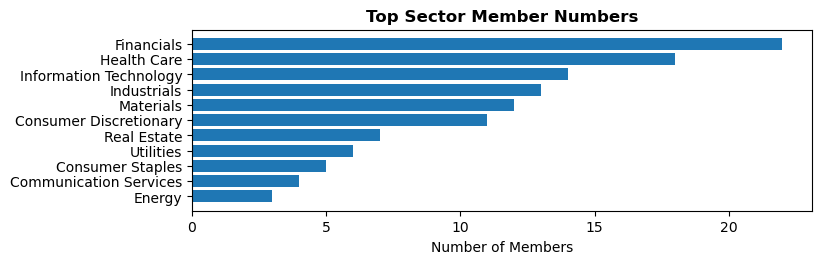

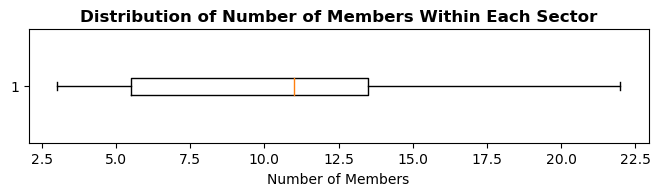

In [37]:
# Function to Create a Series of Graphs to Show the Distribution and Makeup of the Sector Membership
def display_sector_graphs(colors, sector_counts, sector_counts_series):

    """
    Function to create three different graphical representations of the Industry/Sector Member Split.
    Executed as three different figures given it displays better in Ed than as one figure with three
    different subplots.
    """
    
    # Display Pie Chart Showing Industry Size Split
    fig1 = plt.figure(figsize=(25, 25))
    ax = fig1.add_subplot(3, 1, 1)
    ax.pie(sector_counts_series, labels = sector_counts.index,colors = colors)
    ax.set_title('Sector Split by Number of Members', fontweight='bold')

    # Bar Chart of Which Industries Have the Most Members
    fig2 = plt.figure(figsize=(8, 8))
    ax = fig2.add_subplot(3, 1, 2)
    ax.barh(sector_counts_series.index , sector_counts.values)
    ax.set_title('Top Sector Member Numbers', fontweight='bold')
    ax.set_xlabel('Number of Members')

    # Box Plot Of Industry Member Distribution
    fig3 = plt.figure(figsize=(8, 5))
    ax = fig3.add_subplot(3, 1, 3)
    ax.boxplot(all_stocks_info_df.groupby('GICS Sector')['Symbol'].count(), 0, 'rs', 0)
    ax.set_title('Distribution of Number of Members Within Each Sector', fontweight='bold')
    ax.set_xlabel('Number of Members')

    return fig1, fig2, fig3

# Run function to display plots
fig1, fig2, fig3 = display_sector_graphs(colors, sector_counts, sector_counts)

<p style="background-color:#B8E2F2;">
    <b>Finding:</b> There is a reasonable level of diversity within Sectors/Industry with our component stocks being distributed across 11 different industries.  
    This relatively wide distribution across sectors is an important finding given the key factor we are investigating is sector/ industry type.  For example, it would be problematic if there were only two or three industries and 99% of the members fell into only one industry.
</p>

<p style="background-color:#B8E2F2;">
<b>Finding:</b> Also of note is that given there are 11 different industries for approximately 115 companies, while diversity certaily exists, the definition of what is included within an industry must be reasonably broad. 
</p>

In [38]:
all_stocks_info_df.groupby('GICS Sector')['Symbol'].count()

GICS Sector
Communication Services     4
Consumer Discretionary    11
Consumer Staples           5
Energy                     3
Financials                22
Health Care               18
Industrials               13
Information Technology    14
Materials                 12
Real Estate                7
Utilities                  6
Name: Symbol, dtype: int64

Where the Sector only has a single member, comparing members within the same industry will not be possible. 

Given we are looking to compare companies within the same industry vs companies not in the same industry, we want to identify if any sectors have less than 2 names in them.

In [39]:
all_stocks_info_df.groupby('GICS Sector')['Symbol'].count()

GICS Sector
Communication Services     4
Consumer Discretionary    11
Consumer Staples           5
Energy                     3
Financials                22
Health Care               18
Industrials               13
Information Technology    14
Materials                 12
Real Estate                7
Utilities                  6
Name: Symbol, dtype: int64

<p style="background-color:#AFE1AF;">
We can see that all our industries contain at least three members.
</p>

## Analyse Ratio of Same Industry Vs Different Industry Pairs

### Full Universe of Names

In [40]:
num_pairs_all = len(all_possible_pairs_df.index)
num_pairs_same_ind_all = len(all_possible_pairs_df[all_possible_pairs_df['Same Industry'] == 'Yes'].index)

print(f"Number of Pairs In Total: {num_pairs_all:,}")
print(f"Number of Pairs in the Same Industry: {num_pairs_same_ind_all:,}")
print(f"Percentage of pairs in the same industry: {num_pairs_same_ind_all/num_pairs_all * 100:,.02f}%")

Number of Pairs In Total: 6,555
Number of Pairs in the Same Industry: 729
Percentage of pairs in the same industry: 11.12%


<p style="background-color:#B8E2F2;">
    <b>Finding:</b> A population size of 6,555 pairs overall and 729 pairs in the same industry seems robust enough to generate some meaningful results.
</p>

### Sample

In [41]:
num_pairs_all_samp = len(random_pairs_df.index)
num_pairs_same_ind_samp = len(random_pairs_df[random_pairs_df['Same Industry'] == 'Yes'].index)

print(f"Number of Pairs In Total: {num_pairs_all_samp:,}")
print(f"Number of Pairs in the Same Industry: {num_pairs_same_ind_samp:,}")
print(f"Percentage of pairs in the same industry: {num_pairs_same_ind_samp/num_pairs_all_samp * 100:,.02f}%")

Number of Pairs In Total: 4,000
Number of Pairs in the Same Industry: 454
Percentage of pairs in the same industry: 11.35%


<p style="background-color:#B8E2F2;">
    <b>Finding:</b> A sample size of 4,000 pairs overall and 438 pairs in the same industry seems robust enough to generate some meaningful results.
</p>

In [42]:
df = pd.DataFrame(data = [[num_pairs_all, num_pairs_same_ind_all, num_pairs_same_ind_all/num_pairs_all * 100], 
                          [num_pairs_all_samp, num_pairs_same_ind_samp, num_pairs_same_ind_samp/num_pairs_all_samp * 100]], 
                  columns=['Number of Total Pairs', 'Number of Pairs in Same Industry', '% of Pairs in the Same Industry'])
df.index = ['Entire Population', 'Sample']
df

,Number of Total Pairs,Number of Pairs in Same Industry,% of Pairs in the Same Industry
Entire Population,6555,729,11.121281
Sample,4000,454,11.350000


<p style="background-color:#AFE1AF;">
Our sample does seem representative of the total population in term pairs in the same industry vs all pairs.
</p>

<a id="Correlations"></a>
# 10. Correlations

## Calculate Correlations

First we build a dataframe of correlations for ALL pairs in our sample.

In [43]:
corr_array = []

# Iterate through all the pairs in our sample 
for i in range(len(random_pairs_df)):
    
    # Calculate the correlation for each pair
    corr = stock_prices_df[random_pairs[i][0]].corr(stock_prices_df[random_pairs[i][1]])
    # Append the result
    corr_array.append([random_pairs[i][0], random_pairs[i][1], corr])
    
    i += 1
# Create a DataFrame from the correlation array
corr_df = pd.DataFrame(data=corr_array, columns=['Ticker1', 'Ticker2', 'Correlation'])
# Merge with the random_pairs dataframe to add the descriptive colums
corr_df = pd.merge(corr_df, random_pairs_df, how='inner', left_on = ['Ticker1', 'Ticker2'], right_on = ['Ticker1', 'Ticker2'])
corr_df

,Ticker1,Ticker2,Correlation,Ind1,Ind2,Same Industry
0,ACGL,BBY,-0.027985,Financials,Consumer Discretionary,No
1,AWK,CCL,0.575780,Utilities,Consumer Discretionary,No
2,AMZN,CSL.AX,0.137880,Consumer Discretionary,Health Care,No
3,ADBE,AZO,-0.624955,Information Technology,Consumer Discretionary,No
4,AMCR,BBY,-0.149366,Materials,Consumer Discretionary,No
...,...,...,...,...,...,...
3995,ALL,CNC,-0.038760,Financials,Health Care,No
3996,CPT,PLS.AX,-0.485392,Real Estate,Materials,No
3997,ANZ.AX,NST.AX,0.739002,Financials,Materials,No
3998,A,T,-0.063309,Health Care,Communication Services,No


## Analyze Correlations

We are analyzing the absolute values of the correlations as we are interested in the magnitude of the corrleations - negative correlations are as usual as positive ones.

In [44]:
# Absolute correlation levels for ALL pairs
corr_all = abs(corr_df['Correlation']).describe() # Convert correlations to absolute values

# Absolute correlation levels for pairs in the same industry
corr_same_ind = abs(corr_df[corr_df['Same Industry'] == 'Yes']['Correlation']).describe()

# Combine the different correlation serieses into a DF for easier display and analysis
df = pd.DataFrame(corr_all)
df = pd.DataFrame({'Corr all': corr_all, 'Corr Same Industry': corr_same_ind})
df.loc['Median', :]= [abs(corr_df['Correlation']).median(), abs(corr_df[corr_df['Same Industry'] == 'Yes']['Correlation']).median()]
df

,Corr all,Corr Same Industry
count,4000.000000,454.000000
mean,0.433650,0.483697
std,0.262776,0.273063
min,0.000065,0.002901
25%,0.206891,0.240075
50%,0.417757,0.487277
75%,0.648703,0.720327
max,0.967249,0.958228
Median,0.417757,0.487277


<p style="background-color:#B8E2F2;">
    <b>Finding:</b> At a summary level there does appear to be a higher correlation level for pairs in the same industry.
</p>

## Analyse by Industry : Are Some Industry Groups Better Than Others?

Creating a DataFrame which gives us some summary info by Industry for Pairs Which are Both in the Same Industry

In [45]:
# Take the df of all correlations, extract same industry pairs and get the median correlation and count for those those pairs
df = corr_df[corr_df['Same Industry'] == 'Yes'].groupby('Ind1').agg(Median =('Correlation', 'median'),\
                                                                   Count=('Correlation','count'))
df = df.reset_index()
df['Median'] = abs(df['Median'])
df = df.sort_values(['Median', 'Count']).set_index('Ind1', drop=True)
df.index.name = ""

If we only have one pair in an industry, it is difficult to make any comparision of that industry vs another.  Thus we will limit our comparison to industries with at least 10 names in it.

In [46]:
# Limit our target dataframe to only include sectors with 10 or more members
df = df[df['Count']>=10]
df = df.sort_values('Median')
df

,Median,Count
,,
Materials,0.157493,41
Health Care,0.172482,103
Financials,0.379208,138
Industrials,0.404191,48
Information Technology,0.613278,56
Utilities,0.621953,11
Consumer Discretionary,0.721808,34
Real Estate,0.846341,11


## Display Results Graphically

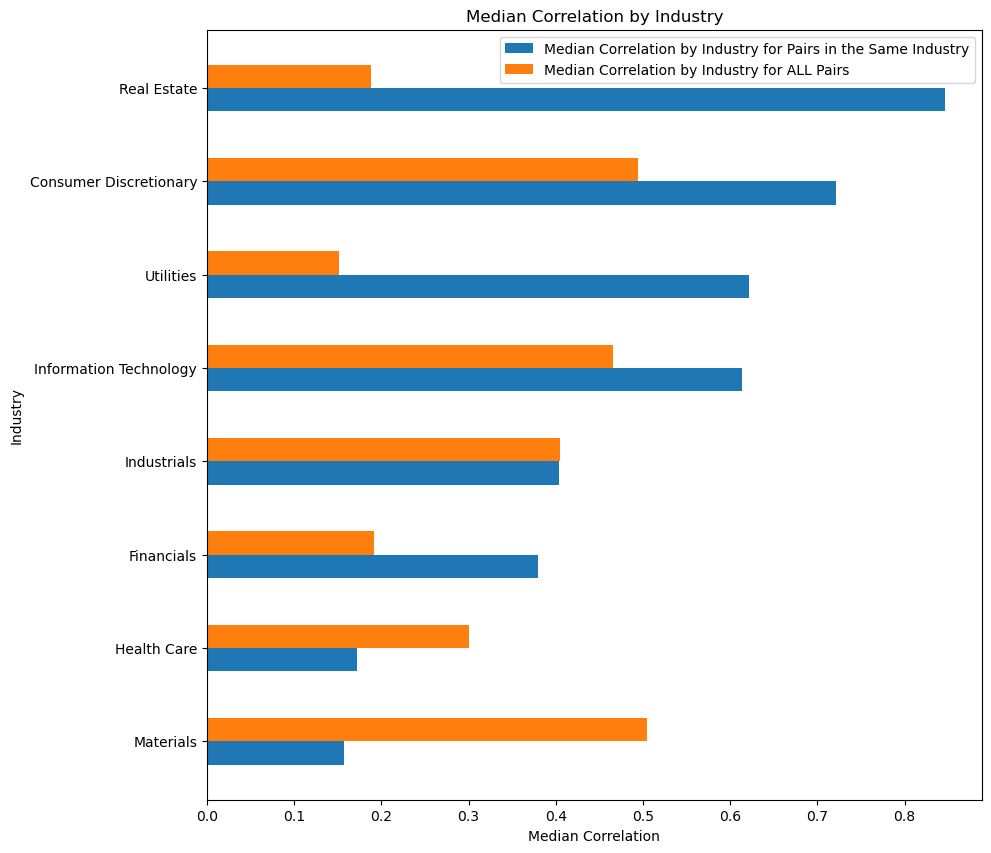

In [47]:
def same_vs_random_ind_plot():

    # Calculate median correlations
    medians_same_ind = abs(df['Median'])
    medians_all_ind = abs(corr_df.groupby('Ind1')['Correlation'].median())

    # We only want to plot the industries that have sufficient same industry pairs
    medians_all_ind = medians_all_ind[medians_all_ind.index.isin(df.index)]

    # Create figure and axis
    fig, ax = plt.subplots(figsize=[10,10])

    # Set a width for the bars
    b_width = 0.25

    # We have to define bar positions if we want the different plots to be side by side
    b1_positions = np.arange(len(medians_same_ind))
    b2_positions = b1_positions + b_width # Puts the position beside the prior bar

    # Create the two bar charts
    ax.barh(b1_positions, medians_same_ind, height=b_width, label='Median Correlation by Industry for Pairs in the Same Industry')
    ax.barh(b2_positions, medians_all_ind, height=b_width, label='Median Correlation by Industry for ALL Pairs')

    # Define tick sizes, x and y labels as well as the title
    ax.set_yticks(b1_positions + b_width / 2) # set spacings for the ticks
    ax.set_yticklabels(medians_same_ind.index) # label the ticks
    ax.set_ylabel('Industry')
    ax.set_xlabel('Median Correlation')

    ax.set_title('Median Correlation by Industry')

    # Show legend
    ax.legend()

    return ax

# Run function to generate bar plot comparing same industry pairs vs random pairs by industry group
ax = same_vs_random_ind_plot()


<p style="background-color:#B8E2F2;">
    <b>Finding:</b> The range of correlations does vary signficantly across industries.
</p>

<p style="background-color:#B8E2F2;">
    <b>Finding:</b> This graph also reinforces the earlier finding that the correlation levels are higher for pairs which are both in the same industry vs disparate pairs - as the same industry pairs have higher correlation for almost all industries
</p>

<p style="background-color:#B8E2F2;">
    <b>Finding:</b> It appears that there seems to be INVERSE correlation between the number of members in the Sector and the Median correlation of Sector Members.
    
One possible explanation for this may be that Sectors with larger numbers of members may also be those defined broadly.  If the Sector is quite broad the business models within that sector are likley to become less closely related.

This would require further data analysis and possibly include trying to create sub sectors to see if that creates higher correlation levels.
</p>

In [48]:
df.corr()

,Median,Count
Median,1.00000,-0.58092
Count,-0.58092,1.00000


<a id="Findings"></a>
# 11. Summary of Findings

We found that from a sample of 115 stocks we can produce a universe of approximately 6,500 pairs which is seems quite a healthy population size.  We trimmed this to 4,000 pairs to ensure our processing environment can handle our analysis.
When we break out how many of those represent pairs in the same industry, we have 729 pairs in our total universe of pairs and then 458 pairs when we trim to a starting sample size of 4,000 pairs.  458 pairs again seems like a reasonably robust sample size to draw some initial conclusions from.

Our pairs are split across 11 different sector groups with the Financials and Health Care sectors have the most members and the Energy and Communications Services sectors having the least.  This relatively wide distribution across sectors is important given the key factor we are investigating is sector/ industry type.  For example, it would be problematic if there were only two or three industries and 99% of the members fell into only one industry.

The sample population pairs have a mean and median correlation level of .43 and .41.  That is certainly meaningful and demonstrates that even random sets of pairs on average have a reasonable level of correlation.  That is consistent with general stock market findings where overall stocks move in the same direction.  This correlation for all stocks is why it was important we set a benchark to compare the pairs in the same industry - simply finding a non zero corrleation for our same industry pairs would not have helped determine if it is an appropriate factor.

The same industry pairs have a mean and median correlation level of .50 (vs 0.43) and 0.51(vs .41) which represents a meaningfully higher level than the random pairs.  Importantly, this higher correlation also appears to occur with a high (but not absolute) level of consistency across sectors.

It is definitely the case that the correlation levels vary by sector (when considering pairs in the same sector) and vary quite signficantly:
* Real Estate has a median correlation level of 0.88; vs
* Healthcare 0.19.
    
In looking for reasons for the variance across industries one factor we identified was those sectors with a large number of members seemed generally to have lower correlation levels, perhaps indicating that they are 'broader' in their industry definition and thus their are less synergies in the business models of members.  Additional steps we could take to confirm this include:
* doing the same analysis at the sub-industry level
* doing our analysis for multiple time periods
* increasing our population and sample size to analyze a greater number of pairs.
    


<a id="References"></a>
# 12. References

Aroussi, R., 2023, yfinance.[python library]  
> Available at https://pypi.org/project/yfinance/(Accessed: 3 August, 2023)

ASX, 2023.  *Top 20 Shares by Value.* [pdf] 
> Available at https://www.asx.com.au/data/dw_sharesbyvalue.pdf (Accessed, August 3 2023).

Investopedia.com, 2023. *Pairs Trade: Definition, How Strategy Works, and Example*
https://www.investopedia.com/terms/p/pairstrade.asp (Accessed: 8 August, 2023)

Wikipedia, 2023. *S&P 500 component stocks.*
> Available at https://en.wikipedia.org/wiki/List_of_S%26P_500_companies (Accessed: July 31 2023)

Yahoo Finance, 2023.  *Stock Market and Foreign Currency Historical Market Data.*  
> Available at:
    https://finance.yahoo.com/quote/[Symbol_Code]/history?p=[Symbol_Code](Accessed: 3 August, 2023)

Yahoo Finance, 2023.  *Company Profile Data Incuding Sector Name.*  
> Available at:
    https://finance.yahoo.com/quote/[Symbol_Code]/profile?p=[Symbol_Code](Accessed: 3 August, 2023)

> Note: 115 different stocks and four different foreign currencies were analyzed and thus the individual symbol codes for each are not listed.


In [49]:
# Observe when notebook was last run all the way through successfully
print(datetime.now())

2023-08-10 22:34:15.426378
